In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from sklearn.cross_validation import KFold, cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error as mse
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [3]:
CL = ['duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'class'
]

In [28]:
df = pd.read_csv('KDD1.csv')

In [30]:
df.head(333)

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,25,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0,udp,domain_u,SF,33,0,0,0,0,0,...,36,0.14,0.03,0.14,0.00,0.00,0.00,0.00,0.00,normal
329,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.60,0.56,0.00,0.01,0.00,0.57,1.00,anomaly
330,0,tcp,private,RSTR,0,0,0,0,0,0,...,1,0.00,0.64,0.64,0.00,0.00,0.00,0.64,1.00,anomaly
331,0,udp,domain_u,SF,44,70,0,0,0,0,...,234,0.92,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal


In [23]:
df.tail(32)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,'daytime','discard',...,'tim_i','time','urh_i','urp_i','uucp','uucp_path','vmnet','whois','X11','Z39_50'}
125981,0.0,tcp,http,SF,230.0,12471.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125982,0.0,icmp,ecr_i,SF,30.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125983,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125984,1.0,tcp,smtp,SF,2049.0,362.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125985,0.0,tcp,http,SF,247.0,799.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125986,0.0,tcp,finger,S0,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125987,0.0,icmp,eco_i,SF,18.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125988,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125989,0.0,tcp,http,REJ,0.0,0.0,0.0,0.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125990,0.0,udp,private,SF,28.0,0.0,0.0,3.0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = pd.read_csv('KDD1.csv', names = CL, header = None)

In [5]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [6]:
data.shape

(125973, 42)

In [35]:
data.head(7)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [36]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [39]:
data.shape

(125973, 42)

In [41]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [42]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
data['class'].value_counts()

normal     67343
anomaly    58630
Name: class, dtype: int64

In [46]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [55]:
categorical_features = [feature for feature in data.columns if data[feature].dtype=='O']
categorical_features

['protocol_type', 'service', 'flag', 'class']

In [47]:
data['protocol_type'].value_counts() # LABLE ENCODING

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [52]:
data['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [58]:
data['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

In [57]:
data['class'].value_counts()   # MAP

normal     67343
anomaly    58630
Name: class, dtype: int64

In [64]:
neumerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
neumerical_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [70]:
df_neu = data[['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot']]
#  'num_failed_logins',
#  'logged_in',
#  'num_compromised',
#  'root_shell',
#  'su_attempted',
#  'num_root',
#  'num_file_creations',
#  'num_shells',
#  'num_access_files',
#  'num_outbound_cmds',
#  'is_host_login',
#  'is_guest_login',
#  'count',
#  'srv_count',
#  'serror_rate',
#  'srv_serror_rate',
#  'rerror_rate',
#  'srv_rerror_rate',
#  'same_srv_rate',
#  'diff_srv_rate',
#  'srv_diff_host_rate',
#  'dst_host_count',
#  'dst_host_srv_count',
#  'dst_host_same_srv_rate',
#  'dst_host_diff_srv_rate',
#  'dst_host_same_src_port_rate',
#  'dst_host_srv_diff_host_rate',
#  'dst_host_serror_rate',
#  'dst_host_srv_serror_rate',
#  'dst_host_rerror_rate',
#  'dst_host_srv_rerror_rate']]

C:\Users\panka\anaconda3\envs\PAPER\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

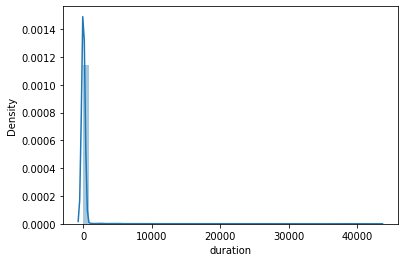

In [72]:
sns.distplot(df_neu['duration'])

C:\Users\panka\anaconda3\envs\PAPER\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='src_bytes', ylabel='Density'>

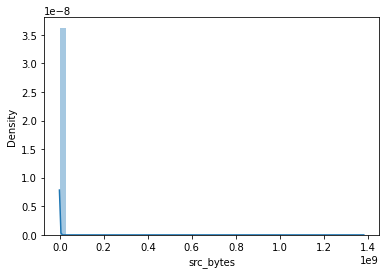

In [73]:
sns.distplot(df_neu['src_bytes'])

C:\Users\panka\anaconda3\envs\PAPER\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dst_bytes', ylabel='Density'>

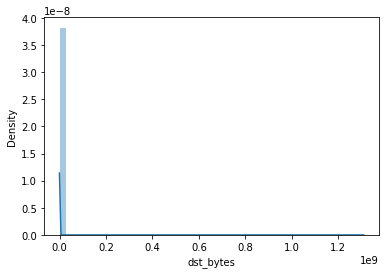

In [74]:
 sns.distplot(df_neu['dst_bytes'])

C:\Users\panka\anaconda3\envs\PAPER\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rerror_rate', ylabel='Density'>

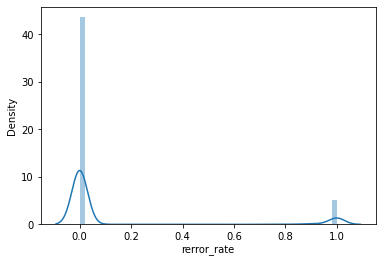

In [76]:
 sns.distplot(data['rerror_rate'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## CATEGORICAL FEATURE ENCODING

In [115]:
Data = data.copy()

In [124]:
categorical_features = [feature for feature in Data.columns if Data[feature].dtype=='O']
categorical_features

['protocol_type', 'service', 'flag']

In [123]:
Data['class'].unique()

array([1, 0], dtype=int64)

In [118]:
class_coder = {'normal':1, 'anomaly':0}
Data['class'] = Data['class'].map(class_coder)

In [119]:
Data['class'].value_counts()  #'normal':1 ,  'anomaly':0

1    67343
0    58630
Name: class, dtype: int64

In [125]:
df1 = pd.get_dummies(Data['protocol_type'],drop_first=True)

In [126]:
df1

,tcp,udp
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
125968,1,0
125969,0,1
125970,1,0
125971,1,0


In [129]:
DF = pd.concat([df1,Data],axis=1)

In [131]:
DF.drop('protocol_type',axis =1, inplace = True)

In [132]:
D = data.copy()

In [133]:
Data = DF.copy()

In [134]:
Data.head()

,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,0,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,1,0,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,1,0,0,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,1,0,0,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,1,0,0,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [135]:
Data['flag'].value_counts()

SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64

In [136]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [140]:
 Data['flag'] = le.fit_transform(Data['flag'])

In [142]:
 Data['flag'].value_counts()

9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64

In [143]:
 Data['service'] = le.fit_transform(Data['service'])

In [144]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tcp                          125973 non-null  uint8  
 1   udp                          125973 non-null  uint8  
 2   duration                     125973 non-null  int64  
 3   service                      125973 non-null  int32  
 4   flag                         125973 non-null  int32  
 5   src_bytes                    125973 non-null  int64  
 6   dst_bytes                    125973 non-null  int64  
 7   land                         125973 non-null  int64  
 8   wrong_fragment               125973 non-null  int64  
 9   urgent                       125973 non-null  int64  
 10  hot                          125973 non-null  int64  
 11  num_failed_logins            125973 non-null  int64  
 12  logged_in                    125973 non-null  int64  
 13 

In [146]:
X = Data.iloc[:,:-1]
y = Data['class']

In [148]:
y

0         1
1         1
2         0
3         1
4         1
         ..
125968    0
125969    1
125970    1
125971    0
125972    1
Name: class, Length: 125973, dtype: int64

In [147]:
X

,tcp,udp,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,20,9,491,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,1,0,44,9,146,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,1,0,0,49,5,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,1,0,0,24,9,232,8153,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,1,0,0,24,9,199,420,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,0,0,49,5,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125969,0,1,8,49,9,105,145,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125970,1,0,0,54,9,2231,384,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125971,1,0,0,30,5,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.30 , random_state = 0)


In [150]:
def models(X_train,Y_train):
    
    #Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train,Y_train)
    
    
    # Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    tree.fit(X_train,Y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest  = RandomForestClassifier(n_estimators=10,criterion = 'entropy', random_state=0)
    forest.fit(X_train,Y_train)
    
    # KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train,Y_train)
    
    #LDA
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train,Y_train)
    
    # Bagging
    from sklearn.ensemble import BaggingClassifier
    bgg = BaggingClassifier()
    bgg.fit(X_train,Y_train)
    
    # adaboost
    from sklearn.ensemble import AdaBoostClassifier
    ada = AdaBoostClassifier()
    ada.fit(X_train,Y_train)
    
    #Gradient boost
    from sklearn.ensemble import GradientBoostingClassifier
    grd = GradientBoostingClassifier()
    grd.fit(X_train, Y_train)
    
    # ExtraTreesClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    ext = ExtraTreesClassifier()
    ext.fit(X_train,Y_train)
    
    # Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    Gau = GaussianNB()
    Gau.fit(X_train,Y_train)
    
    # support Vector Machine
    from sklearn.svm import SVC
    V = SVC()
    V.fit(X_train,Y_train)
    


  
    
    #Print the  model accuracy on the training data
    print("[0] Logistic Regression Training Accuracy :", log.score(X_train,Y_train))
    print("[1] Decision Tree Training Acuuracy :", tree.score(X_train,Y_train))
    print("[2] Random Forest Training Accuracy :", forest.score(X_train,Y_train))
    print("[3] KNN Training Accuracy :", knn.score(X_train,Y_train))
    print("[4] LDA Training Accuracy :", lda.score(X_train,Y_train))
    
    print("[5] Bagging Training Accuracy :", bgg.score(X_train,Y_train))
    print("[6] adaboost Training Accuracy :", ada.score(X_train,Y_train))
    print("[7] Gradient Training Accuracy :", grd.score(X_train,Y_train))
    print("[8] ExtraTreesClassifier Training Accuracy :", ext.score(X_train,Y_train))
    
    print("[9]  GaussianNB Training Accuracy :", Gau.score(X_train,Y_train))
    print("[10] Support Vector Machine Training Accuracy :", V.score(X_train,Y_train))
    
    
    return  log, tree, forest, knn, lda, bgg, ada, grd,ext,Gau,V


In [151]:
model = models(X_train,Y_train)

[0] Logistic Regression Training Accuracy : 0.8771730871729738
[1] Decision Tree Training Acuuracy : 0.9999546387543802
[2] Random Forest Training Accuracy : 0.9999319581315703
[3] KNN Training Accuracy : 0.9967906918723988
[4] LDA Training Accuracy : 0.9524727549018496
[5] Bagging Training Accuracy : 0.9998752565745456
[6] adaboost Training Accuracy : 0.9874009140290992
[7] Gradient Training Accuracy : 0.995599959174879
[8] ExtraTreesClassifier Training Accuracy : 0.9999546387543802
[9]  GaussianNB Training Accuracy : 0.534491557138159
[10] Support Vector Machine Training Accuracy : 0.5354101223619601


In [153]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    print("Model",i)
    cm = confusion_matrix(Y_test,model[i].predict(X_test))
    
    TP = cm[1][1]
    TN = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    
    print(cm)
    print("Testing Accuracy = ",(TP + TN)/(TP + TN + FN + FP))
    print()
    

Model 0
[[15140  2491]
 [ 2129 18032]]
Testing Accuracy =  0.8777519051651143

Model 1
[[17607    24]
 [   42 20119]]
Testing Accuracy =  0.9982535986452159

Model 2
[[17604    27]
 [   21 20140]]
Testing Accuracy =  0.9987298899237934

Model 3
[[17558    73]
 [   92 20069]]
Testing Accuracy =  0.9956339966130398

Model 4
[[16573  1058]
 [  842 19319]]
Testing Accuracy =  0.9497248094834886

Model 5
[[17604    27]
 [   30 20131]]
Testing Accuracy =  0.9984917442845047

Model 6
[[17271   360]
 [  165 19996]]
Testing Accuracy =  0.9861081710414903

Model 7
[[17518   113]
 [   78 20083]]
Testing Accuracy =  0.9949460203217613

Model 8
[[17591    40]
 [   24 20137]]
Testing Accuracy =  0.9983065198983911

Model 9
[[  330 17301]
 [  288 19873]]
Testing Accuracy =  0.5345840389500424

Model 10
[[   28 17603]
 [    2 20159]]
Testing Accuracy =  0.5341606689246401



# SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.30 , random_state = 0)

In [ ]:
# support Vector Machine
from sklearn.svm import SVC
V = SVC()
V.fit(X_train,Y_train)
    

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)